# Two Point Spatial Correlation Calculation

In this notebook, we are demonstrating a simple case study for calculating 2-point spatial correlations on experimental microstructure data. First, we will demonstrate how to calculate spatial correlations for single 2 phase image. Then , we will demonstrate the most efficient way to calculate 2-point spatial correlations for multiple structure data without using any for-loop.

Importing necessary packages to perform 2-point spatial correlations calculations

In [6]:
import warnings
import os

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings('ignore')

import dask.array as da
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from dask_ml.decomposition import PCA
from dask_ml.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from dask_ml.model_selection import train_test_split
from dask_ml.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D

from pymks import (
    generate_multiphase,
    solve_fe,
    plot_microstructures,
    PrimitiveTransformer,
    TwoPointCorrelation,
    FlattenTransformer
)

## Reading the Experimental Data


In [7]:
 from PIL import Image
im = Image.open('image.tiff')


Let's visualize the structure!


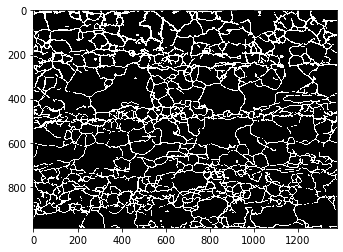

In [9]:
plt.imshow(im,cmap='gray')

## Calculating the 2-point Stats

In [24]:
imarray = np.array(im)
imarray=np.expand_dims(imarray,axis=0)

In [25]:
imarray.shape

(1, 986, 1376)

Create Array for 2-point

In [26]:
nx_data=PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(imarray).compute()

Little bit confusing

In [27]:
nx_data.shape

(1, 986, 1376, 2)

In [28]:
TwoPt = TwoPointCorrelation(periodic_boundary=True, cutoff=25,correlations=[(0,0)])
AutoCorrelation = TwoPt.transform(nx_data).compute()

In [29]:
AutoCorrelation.shape

(1, 51, 51, 1)

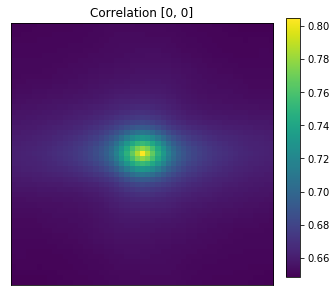

In [30]:
plot_microstructures(
    AutoCorrelation[0, :, :, 0],
    titles=['Correlation [0, 0]']
)